<center> 
<h1> Data analysis programming project </h1>
<h4> Rafael Takata García </h4>
<h5> Spring 2024 </h5>
 </center>

School is a stage of formation in which we develop skills and knowledge like no other. Understanding the factors that affect student performance would help us create an educational system capable of maximizing learning and really take advantage of the education received.

In 2008, Paulo Cortez and Alice Silva dedicated themselves to collecting the largest number of features of some students in secondary schools in the country of Portugal. Two groups were studied, people who studied Portuguese and those who studied mathematics. For this project, we will work with the fisrt to try to develop a prediction model for the second.

The creation of a model capable of describing this relationship would tell us about the areas of opportunity within the nation's educational system in addition to significant insights about the country's youth.

### References

 
Cortez, Paulo. (2014). Student Performance. UCI Machine Learning Repository. https://doi.org/10.24432/C5TG7T.

### Variables

**The variables are the following:** 
 - school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
 - sex - student's sex (binary: 'F' - female or 'M' - male)
 - age - student's age (numeric: from 15 to 22)
 - address - student's home address type (binary: 'U' - urban or 'R' - rural)
 - famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
 - Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
 - Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
 - Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
 - Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
 - Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
 - reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
 - guardian - student's guardian (nominal: 'mother', 'father' or 'other')
 - traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
 - studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
 - failures - number of past class failures (numeric: n if 1<=n<3, else 4)
 - schoolsup - extra educational support (binary: yes or no)
 - famsup - family educational support (binary: yes or no)
 - paid - extra paid classes within the course subject (binary: yes or no)
 - activities - extra-curricular activities (binary: yes or no)
 - nursery - attended nursery school (binary: yes or no)
 - higher - wants to take higher education (binary: yes or no)
 - internet - Internet access at home (binary: yes or no)
 - romantic - with a romantic relationship (binary: yes or no)
 - famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
 - freetime - free time after school (numeric: from 1 - very low to 5 - very high)
 - goout - going out with friends (numeric: from 1 - very low to 5 - very high)
 - Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
 - Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
 - health - current health status (numeric: from 1 - very bad to 5 - very good)
 - absences - number of school absences (numeric: from 0 to 93)
 - These grades are related to the course subject for Portuguese:
 - G1 - first period grade (numeric: from 0 to 20)
 - G2 - second period grade (numeric: from 0 to 20)
 - G3 - final grade (numeric: from 0 to 20, output target)


### Libraries

In [458]:
import numpy as np #Work with arrays
import pandas as pd #Dataframes
import seaborn as sns #Heatmap
import matplotlib.pyplot as plt #Plotting for graphs
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, GridSearchCV

### Creation of the dataframe and general info

In [459]:
#Creation of the dataframe
porclass_df = pd.read_csv('../data/raw/student-por.csv')
porclass_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [460]:
#We have 649 rows and 33 columns
porclass_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [461]:
# Unique values
porclass_df.apply(lambda x: x.unique())

school                                                 [GP, MS]
sex                                                      [F, M]
age                            [18, 17, 15, 16, 19, 22, 20, 21]
address                                                  [U, R]
famsize                                              [GT3, LE3]
Pstatus                                                  [A, T]
Medu                                            [4, 1, 3, 2, 0]
Fedu                                            [4, 1, 2, 3, 0]
Mjob                [at_home, health, other, services, teacher]
Fjob                [teacher, other, services, health, at_home]
reason                        [course, other, home, reputation]
guardian                                [mother, father, other]
traveltime                                         [2, 1, 3, 4]
studytime                                          [2, 3, 1, 4]
failures                                           [0, 3, 1, 2]
schoolsup                               

Quick Data Visualization

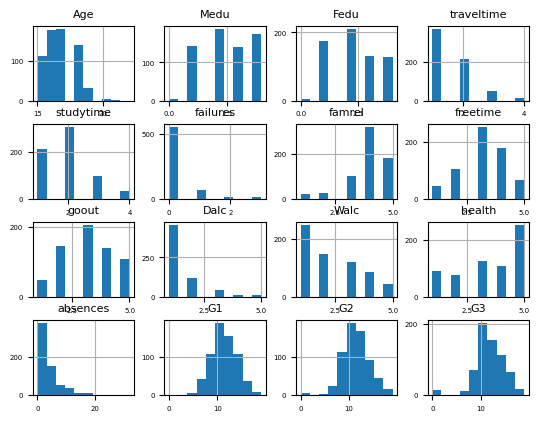

In [462]:
axes = porclass_df.hist(column=porclass_df.columns, xlabelsize=5, ylabelsize=5)
num_columns = ['Age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 
          'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences',
           'G1', 'G2', 'G3']
#This is to change the size of the titles so it's easier to visualize
for i, column in enumerate(axes.flatten()): 
    column.set_title(label= num_columns[i], fontsize=8)

By doing this, we know a little bit more of the behavior of the variables and the general distribution of the numeric ones.

I'm Curious to see if there's a relationship between failures and grades

Text(0.5, 1.0, 'Grade in the final partial by failures')

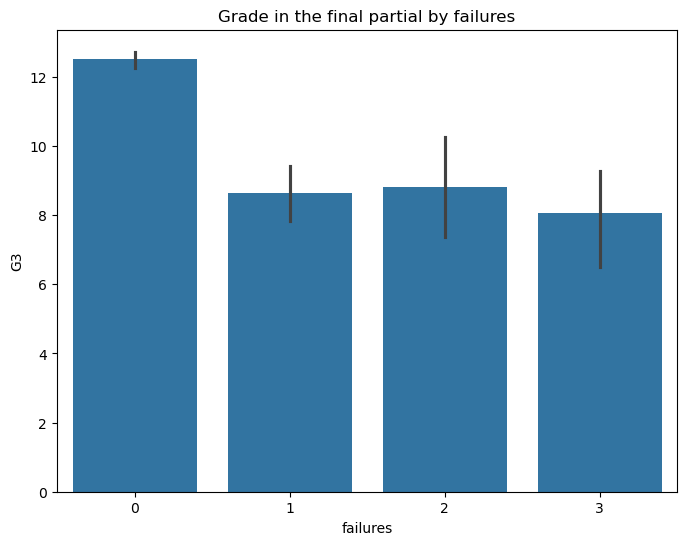

In [463]:
plt.figure(figsize= (8, 6))
sns.barplot(x= 'failures' , y= 'G3', data = porclass_df)
plt.title('Grade in the final partial by failures')

The students with 0 classes failed tend to have better grades in the final part.

#### Data cleaning

As we saw in the description of the variables, there are many nominal or Boolean type variables that we cannot really handle since they are in text, so it is necessary to change them to number before we can generate the relationships.

In [464]:
# variables of yes or no
yn_var = ['schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']
# Two options categorical variables 
bool_var = ['school', 'sex', 'address', 'famsize', 'Pstatus']

In [465]:
#replace the yes or no variables
def yn_var_replace(dataframe, list):
    for x in list:
        dataframe[x] = dataframe[x].replace({'yes': 1, 'no': 0})
yn_var_replace(porclass_df, yn_var)
# Replace the categorical variable that only have two options
def bool_var_replace(dataframe, list):
    for x in list:
        unique_values = dataframe[x].unique()
        dataframe[x] = dataframe[x].replace({unique_values[0] : 1, unique_values[1]: 0})
bool_var_replace(porclass_df, bool_var)


In [466]:
porclass_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,1,1,18,1,1,1,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,1,1,17,1,1,0,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,1,1,15,1,0,0,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,1,1,15,1,1,0,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,1,1,16,1,1,0,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


Now I will use the one-hot codification for the `Mjob` and `Fjob`

In [467]:
porclass_df['Mjob'].unique(), porclass_df['Fjob'].unique()
# They are the same, so we can make the a list that has the same values of both

(array(['at_home', 'health', 'other', 'services', 'teacher'], dtype=object),
 array(['teacher', 'other', 'services', 'health', 'at_home'], dtype=object))

In [468]:
job_values = list(porclass_df['Mjob'].unique())
job_values

['at_home', 'health', 'other', 'services', 'teacher']

In [469]:
porclass_df = pd.get_dummies(porclass_df, columns = ['Mjob', 'Fjob'])
porclass_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,reason,guardian,...,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher
0,1,1,18,1,1,1,4,4,course,mother,...,True,False,False,False,False,False,False,False,False,True
1,1,1,17,1,1,0,1,1,course,father,...,True,False,False,False,False,False,False,True,False,False
2,1,1,15,1,0,0,1,1,other,mother,...,True,False,False,False,False,False,False,True,False,False
3,1,1,15,1,1,0,4,2,home,mother,...,False,True,False,False,False,False,False,False,True,False
4,1,1,16,1,1,0,3,3,home,father,...,False,False,True,False,False,False,False,True,False,False


Let's create a function tu concatenate the two one_hots, we have a problem though, because there already is a variable called health so if we concatenate this column will be overlapped.

In [470]:
porclass_df['health_status'] = porclass_df['health']
porclass_df['health_status']

0      3
1      3
2      3
3      5
4      5
      ..
644    5
645    1
646    5
647    2
648    5
Name: health_status, Length: 649, dtype: int64

In [471]:
def concatenate_one_hot(dataframe, list):
    for x in list:
        mom_values = str('Mjob_' + x)
        dad_values = str('Fjob_' + x)
        #Concatenate
        dataframe[x] = dataframe[mom_values] + dataframe[dad_values]
        #Drop the ones that I have already used
        dataframe.drop(columns=[mom_values, dad_values], inplace=True)
concatenate_one_hot(porclass_df, job_values)
porclass_df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,reason,guardian,...,health,absences,G1,G2,G3,health_status,at_home,other,services,teacher
0,1,1,18,1,1,1,4,4,course,mother,...,False,4,0,11,11,3,True,False,False,True
1,1,1,17,1,1,0,1,1,course,father,...,False,2,9,11,11,3,True,True,False,False
2,1,1,15,1,0,0,1,1,other,mother,...,False,6,12,13,12,3,True,True,False,False
3,1,1,15,1,1,0,4,2,home,mother,...,True,0,14,14,14,5,False,False,True,False
4,1,1,16,1,1,0,3,3,home,father,...,False,0,11,13,13,5,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,0,1,19,0,1,0,2,3,course,mother,...,False,4,10,11,10,5,False,True,True,False
645,0,1,18,1,0,0,3,1,course,mother,...,False,4,15,15,16,1,False,False,True,True
646,0,1,18,1,1,0,1,1,course,mother,...,False,6,11,12,9,5,False,True,False,False
647,0,0,17,1,0,0,3,1,course,mother,...,False,6,10,10,10,2,False,False,True,False


Now let's make our lives easier and use the label encoder from scikit

In [472]:
labelencoder = LabelEncoder()
porclass_df['reason'] = labelencoder.fit_transform(porclass_df['reason'])

In [473]:
porclass_df['guardian'] = labelencoder.fit_transform(porclass_df['guardian'])
porclass_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,reason,guardian,...,health,absences,G1,G2,G3,health_status,at_home,other,services,teacher
0,1,1,18,1,1,1,4,4,0,1,...,False,4,0,11,11,3,True,False,False,True
1,1,1,17,1,1,0,1,1,0,0,...,False,2,9,11,11,3,True,True,False,False
2,1,1,15,1,0,0,1,1,2,1,...,False,6,12,13,12,3,True,True,False,False
3,1,1,15,1,1,0,4,2,1,1,...,True,0,14,14,14,5,False,False,True,False
4,1,1,16,1,1,0,3,3,1,0,...,False,0,11,13,13,5,False,True,False,False


##### To reduce a few columns, I'm going to combinate the variables that talk about similar things

I will make a category to sum the Parents education

In [474]:
porclass_df['Pedu'] = porclass_df['Fedu'] + porclass_df['Medu']
porclass_df = porclass_df.drop(columns= ['Fedu', 'Medu'], axis = 'columns')
porclass_df.head()

,school,sex,age,address,famsize,Pstatus,reason,guardian,traveltime,studytime,...,absences,G1,G2,G3,health_status,at_home,other,services,teacher,Pedu
0,1,1,18,1,1,1,0,1,2,2,...,4,0,11,11,3,True,False,False,True,8
1,1,1,17,1,1,0,0,0,1,2,...,2,9,11,11,3,True,True,False,False,2
2,1,1,15,1,0,0,2,1,1,2,...,6,12,13,12,3,True,True,False,False,2
3,1,1,15,1,1,0,1,1,1,3,...,0,14,14,14,5,False,False,True,False,6
4,1,1,16,1,1,0,1,0,1,2,...,0,11,13,13,5,False,True,False,False,6


Another column for the total alcohol consumption:

In [475]:
porclass_df['alcohol'] = porclass_df['Dalc'] + porclass_df['Walc']
porclass_df = porclass_df.drop(columns= ['Dalc', 'Walc'], axis = 'columns')
porclass_df.head()

,school,sex,age,address,famsize,Pstatus,reason,guardian,traveltime,studytime,...,G1,G2,G3,health_status,at_home,other,services,teacher,Pedu,alcohol
0,1,1,18,1,1,1,0,1,2,2,...,0,11,11,3,True,False,False,True,8,2
1,1,1,17,1,1,0,0,0,1,2,...,9,11,11,3,True,True,False,False,2,2
2,1,1,15,1,0,0,2,1,1,2,...,12,13,12,3,True,True,False,False,2,5
3,1,1,15,1,1,0,1,1,1,3,...,14,14,14,5,False,False,True,False,6,2
4,1,1,16,1,1,0,1,0,1,2,...,11,13,13,5,False,True,False,False,6,3


#### Target column

Finally let's create the target column with the califications

In [476]:
porclass_df['Grade'] = porclass_df['G1'] + porclass_df['G2'] + porclass_df['G3']
porclass_df = porclass_df.drop(columns=['G1', 'G2', 'G3'], axis = 'columns')
porclass_df.tail() #Now we have a grade from 0 to 60

,school,sex,age,address,famsize,Pstatus,reason,guardian,traveltime,studytime,...,health,absences,health_status,at_home,other,services,teacher,Pedu,alcohol,Grade
644,0,1,19,0,1,0,0,1,1,3,...,False,4,5,False,True,True,False,5,3,31
645,0,1,18,1,0,0,0,1,1,2,...,False,4,1,False,False,True,True,4,2,46
646,0,1,18,1,1,0,0,1,2,2,...,False,6,5,False,True,False,False,2,2,32
647,0,0,17,1,0,0,0,1,2,1,...,False,6,2,False,False,True,False,4,7,30
648,0,0,18,0,0,0,0,1,3,1,...,False,4,5,False,True,True,False,5,7,32


Now let's see the distribution of grades.

In [477]:
porclass_df['Grade'].skew(), porclass_df['Grade'].kurt()

(-0.22640562600058028, 0.6043362956597269)

<Axes: >

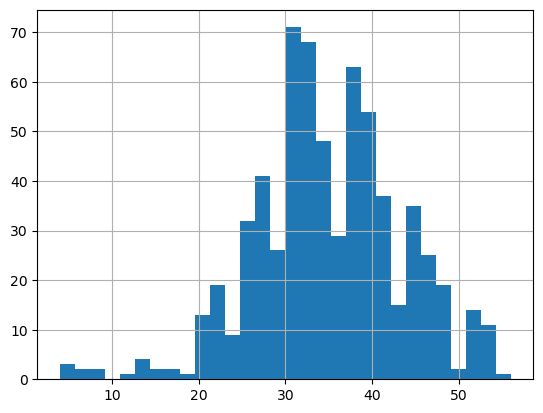

In [478]:
porclass_df['Grade'].hist(bins = 30)

Since it's way too difficult for an algorithm to predict 1 of 60, we are going to separate and classificate the `Grades` in if the student passed or failed the class. We lose a lot of information by doing this but we can upgrade the quality and results of our model by a lot.

In [479]:
#Create the class aproved or not
threshold = 36
porclass_df['Grade'] = pd.cut(porclass_df['Grade'], bins=[-float('inf'), threshold, float('inf')], labels=[0, 1], right=False)
porclass_df

,school,sex,age,address,famsize,Pstatus,reason,guardian,traveltime,studytime,...,health,absences,health_status,at_home,other,services,teacher,Pedu,alcohol,Grade
0,1,1,18,1,1,1,0,1,2,2,...,False,4,3,True,False,False,True,8,2,0
1,1,1,17,1,1,0,0,0,1,2,...,False,2,3,True,True,False,False,2,2,0
2,1,1,15,1,0,0,2,1,1,2,...,False,6,3,True,True,False,False,2,5,1
3,1,1,15,1,1,0,1,1,1,3,...,True,0,5,False,False,True,False,6,2,1
4,1,1,16,1,1,0,1,0,1,2,...,False,0,5,False,True,False,False,6,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,0,1,19,0,1,0,0,1,1,3,...,False,4,5,False,True,True,False,5,3,0
645,0,1,18,1,0,0,0,1,1,2,...,False,4,1,False,False,True,True,4,2,1
646,0,1,18,1,1,0,0,1,2,2,...,False,6,5,False,True,False,False,2,2,0
647,0,0,17,1,0,0,0,1,2,1,...,False,6,2,False,False,True,False,4,7,0


In [480]:
porclass_df['Grade']

0      0
1      0
2      1
3      1
4      1
      ..
644    0
645    1
646    0
647    0
648    0
Name: Grade, Length: 649, dtype: category
Categories (2, int64): [0 < 1]

#### Correlations 

Let's see the correlations between the Grade variable and the rest:

In [481]:
porclass_df.corr()['Grade'].sort_values(ascending=False)

Grade            1.000000
higher           0.304743
Pedu             0.249103
school           0.241127
studytime        0.212855
address          0.178477
teacher          0.148381
internet         0.145861
sex              0.138150
reason           0.128799
famrel           0.090996
activities       0.080084
health           0.072079
nursery          0.063265
famsup           0.025093
Pstatus          0.013182
services        -0.007873
other           -0.011390
famsize         -0.011965
schoolsup       -0.039886
romantic        -0.053247
paid            -0.069215
freetime        -0.073441
goout           -0.082497
guardian        -0.109289
age             -0.111568
health_status   -0.122930
absences        -0.167199
traveltime      -0.179160
at_home         -0.191822
alcohol         -0.224442
failures        -0.321201
Name: Grade, dtype: float64

<Axes: >

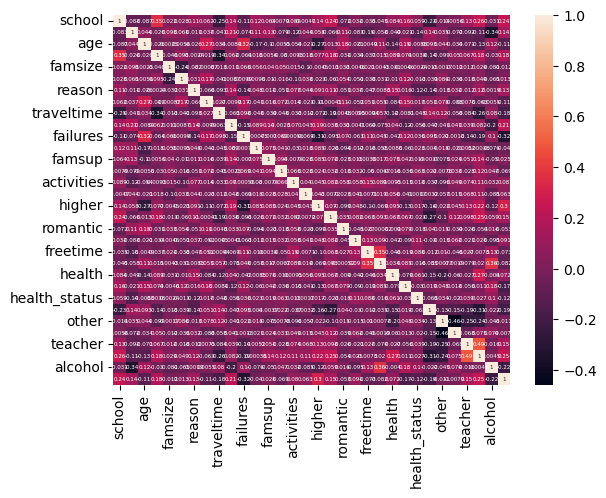

In [482]:
sns.heatmap(porclass_df.corr(), annot= True,  annot_kws = {'size':4})

Finally, I'm going to standardize the age

In [483]:
sts = StandardScaler()
porclass_df['age'] = sts.fit_transform(porclass_df['age'].values.reshape(-1, 1))

Before we get into the testing, let's look for some more insights that we can get from the cleaned information (final visualization)

### EDA (Exploratory Data Analysis)

Im curious to see the relationship betweeen the `Pstatus` (Parent status) and the alcohol consumption.

Text(0.5, 1.0, 'Alcohol consumption depending the Status of the parents')

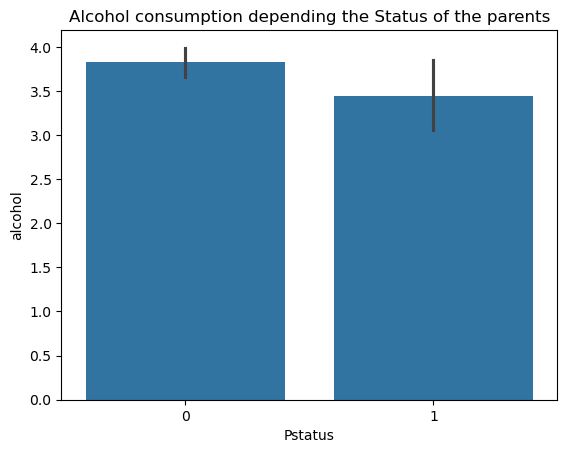

In [484]:
sns.barplot(x='Pstatus', y='alcohol', data = porclass_df)
plt.title('Alcohol consumption depending the Status of the parents')


There's an slightly increase of the alcohol consumption if the parents are not together.

Do parents who couldn't finish their studies want their kids to achieve a greater education?

Text(0.5, 1.0, 'Desire to have higher education depending of the parents education')

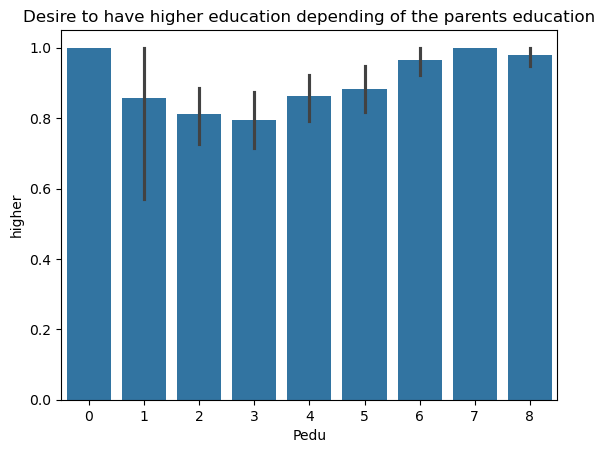

In [485]:
sns.barplot(x='Pedu', y='higher', data = porclass_df)
plt.title('Desire to have higher education depending of the parents education')

There is not a really significant change but we can say that the statement remains true!

Do the students that are in a romantic relationship miss more classes than the ones that are not?

Text(0.5, 1.0, 'Absences by romantic relationship')

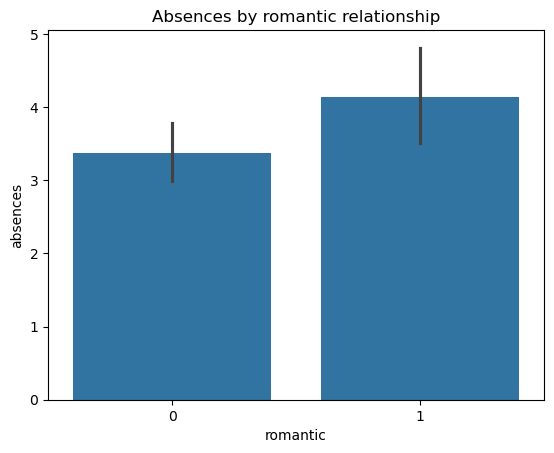

In [563]:
sns.barplot(x='romantic', y='absences', data = porclass_df)
plt.title('Absences by romantic relationship')

The best part about love... missing classes.

Does the freetime you get during the week affects how much alcohol do you consume?

Text(0.5, 1.0, 'Alcohol consumption by freetime')

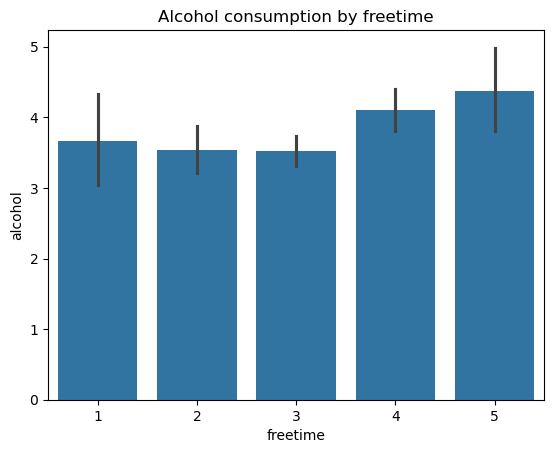

In [566]:
sns.barplot(x='freetime', y='alcohol', data = porclass_df)
plt.title('Alcohol consumption by freetime')

Stay occupied so you won't drink that much.

#### Testing

First, let's see the score if we tested it in the same dataframe. By doing this, we can see the efectivity of the model and then try it with the math class so we can see if there is really a relationship between the grades of the classes.

In [486]:
X = porclass_df.drop(columns = ['Grade'], axis = 1)
y = porclass_df['Grade']

We have to use some type of classfier since we are trying to predict if it is in a cluster. Let's try some of the most famous available in scikit learn and see which one gives us the best score.

In [487]:
tree = DecisionTreeClassifier()
linear = LinearRegression()
lasso = Lasso()
ridge = Ridge()

In [488]:
models = [tree, linear, lasso, ridge]
for clf in models:
    cv_model = cross_val_score(clf, X, y, cv=5).mean()
    print(f'{clf}: {cv_model}')

DecisionTreeClassifier(): 0.5946094215861658
LinearRegression(): 0.17970894172999588
Lasso(): -0.0843891011338274
Ridge(): 0.1808713762794402


We had the best results with the tree classifier, let's keep working with that one. First, we need to create the training and testing data.

In [489]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 3)
x_train.shape, x_test.shape

((519, 31), (130, 31))

### Parameters

although we had a good score overall, we can upgrade it by a lot if we use the best parameters available. We are going to do this by using: GridSearchCV

In [552]:
param_grid = {
    'max_depth': [2,3,4, 5, 6, 7],
    'min_samples_split': [2,3,4, 5,6,7,8,9,10],
    'min_samples_leaf': [1, 2, 3,4, 5]
}

In [553]:
gscv = GridSearchCV(param_grid= param_grid, estimator = tree, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)
gscv.fit(x_train, y_train)

In [555]:
gscv.best_estimator_ #This gives us the parameters for the best score

DecisionTreeClassifier(max_depth=5, max_features='sqrt', min_samples_split=10)

In [557]:
tree = DecisionTreeClassifier(max_depth=5, max_features='sqrt', min_samples_split=10)
tree.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5, max_features='sqrt', min_samples_split=10)

In [558]:
tree.score(x_test, y_test)

0.7230769230769231

Finally we had some disappointing scores, this model does not really prove that you can predict the grade by the rest of factors of the student. 

We can still try it with the dataset of the other class. But first, we have to standarize that dataset the way we did it with this one so the model can work in both.

### Math class dataframe. Creation, cleaning and standardization

In [497]:
math_df = pd.read_csv('../data/raw/student-mat.csv')
math_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [498]:
#Fortunately we made some functions so now it's the time to use them.
yn_var_replace(math_df, yn_var)
bool_var_replace(math_df, bool_var)
math_df = pd.get_dummies(math_df, columns = ['Mjob', 'Fjob'])
math_df['health_status'] = math_df['health']
concatenate_one_hot(math_df, job_values)

In [499]:
# And now the rest
math_df['reason'] = labelencoder.fit_transform(math_df['reason'])
math_df['guardian'] = labelencoder.fit_transform(math_df['guardian'])
math_df['Pedu'] = math_df['Fedu'] + math_df['Medu']
math_df['alcohol'] = math_df['Dalc'] + math_df['Walc']
math_df['Grade'] = math_df['G1'] + math_df['G2'] + math_df['G3']
math_df = math_df.drop(columns= ['Fedu', 'Medu', 'Dalc', 'Walc', 'G1', 'G2', 'G3'], axis = 'columns')
math_df['Grade'] = pd.cut(math_df['Grade'], bins=[-float('inf'), threshold, float('inf')], labels=[0, 1], right=False)
math_df['age'] = sts.fit_transform(math_df['age'].values.reshape(-1, 1))
math_df.head()

,school,sex,age,address,famsize,Pstatus,reason,guardian,traveltime,studytime,...,health,absences,health_status,at_home,other,services,teacher,Pedu,alcohol,Grade
0,1,1,1.023046,1,1,1,0,1,2,2,...,False,6,3,True,False,False,True,8,2,0
1,1,1,0.238380,1,1,0,0,0,1,2,...,False,4,3,True,True,False,False,2,2,0
2,1,1,-1.330954,1,0,0,2,1,1,2,...,False,10,3,True,True,False,False,2,5,0
3,1,1,-1.330954,1,1,0,1,1,1,3,...,True,2,5,False,False,True,False,6,2,1
4,1,1,-0.546287,1,1,0,1,0,1,2,...,False,4,5,False,True,False,False,6,3,0


### Now, the moment of truth

I'm going to compare results in both by using the CrossValScore from scikit.

In [559]:
# First, let's create the X and y for the math class df
x_math = math_df.drop(columns = 'Grade', axis = 1 )
y_math = math_df['Grade']

In [560]:
tree.fit(X, y) #The original parameters from the portuguese dataset

DecisionTreeClassifier(max_depth=5, max_features='sqrt', min_samples_split=10)

In [561]:
tree.score(x_math, y_math)

0.5594936708860759

This is not the score we were looking for. Even with the low prediction score we would like to see similar scores but, with this one. We can conclude that there's no really a relationship between the grades of the math class and the portuguese class. 

If a students does pass one doesn't really mean that he is going to pass the other one.

## Conclusions:

A model that tries to find if a student passed or not based in the variables that were given is not really reliable since it only has a 72.3 % of accuracy. In the other hand, when we tried it with the other class we got even worse results. So, it doesn't exist a significative relationship between the grades of portuguese and the math class.

With the EDA we got some really interesting insights, we found out that the students with divorced parents tend to consume more alcohol than the students which parents are togheter.  Or than the lowest educated parents want ther kids to pursue a higher education.

To conclude, we can say that is not really posible to create a model that predicts if a student is going to pass a class with the variables that were given.
